# Part I - Unsupervised Learning

### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [2]:
data = pd.read_csv("credit_card.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.shape

(8950, 18)

#### Q1. What does the primary analysis of several categorical features reveal?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data["CUST_ID"].unique

<bound method Series.unique of 0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object>

In [6]:
#Customers whose balnace is updated frequently
data.loc[data["BALANCE_FREQUENCY"] > 0.5, "CUST_ID"]

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 7996, dtype: object

In [7]:
#Customers who made purchases frequently
data.loc[data["PURCHASES_FREQUENCY"] > 0.5, "CUST_ID"]

2       C10003
5       C10006
6       C10007
7       C10008
10      C10011
         ...  
8942    C19183
8945    C19186
8946    C19187
8947    C19188
8949    C19190
Name: CUST_ID, Length: 4147, dtype: object

In [8]:
#Customers who made Purchases in one-go frequently
data.loc[data["ONEOFF_PURCHASES_FREQUENCY"] > 0.5, "CUST_ID"]

2       C10003
6       C10007
21      C10022
33      C10034
48      C10050
         ...  
8889    C19130
8895    C19136
8897    C19138
8923    C19164
8949    C19190
Name: CUST_ID, Length: 1343, dtype: object

In [9]:
#Customers who made purchases in installments frequently
data.loc[data["PURCHASES_INSTALLMENTS_FREQUENCY"] > 0.5, "CUST_ID"]

5       C10006
6       C10007
7       C10008
10      C10011
12      C10013
         ...  
8941    C19182
8942    C19183
8945    C19186
8946    C19187
8947    C19188
Name: CUST_ID, Length: 3090, dtype: object

From the above results, we can conclude the number of customers are more in terms of balance upodated frequently as compared to
purchase made frequently, purchases made in one go frequently or purchases made in installments frequently.

#### Q2. Perform the following Exploratory Data Analysis tasks:

a. Missing Value Analysis

In [10]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
data["MINIMUM_PAYMENTS"] = data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean())
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
data["CREDIT_LIMIT"] = data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean())
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

b. Outlier Treatment using the Z-score method

In [13]:
num_cols = list(data.describe().columns.values)
num_cols

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

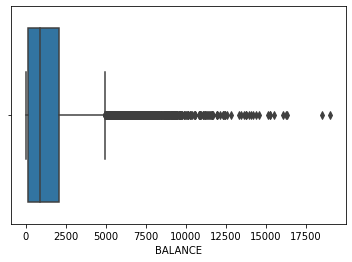

In [14]:
sns.boxplot(data[num_cols[0]])
plt.show()

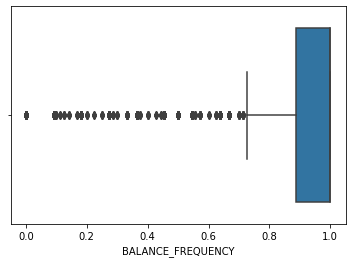

In [15]:
sns.boxplot(data[num_cols[1]])
plt.show()

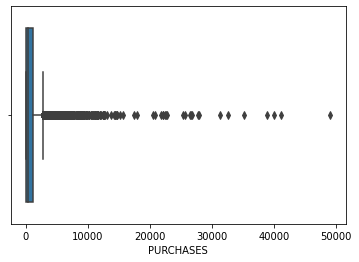

In [16]:
sns.boxplot(data[num_cols[2]])
plt.show()

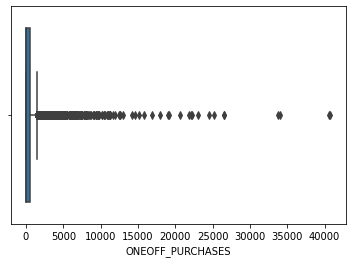

In [17]:
sns.boxplot(data[num_cols[3]])
plt.show()

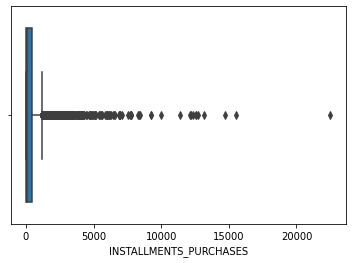

In [18]:
sns.boxplot(data[num_cols[4]])
plt.show()

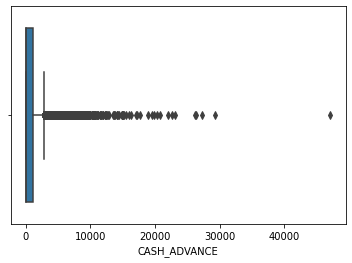

In [19]:
sns.boxplot(data[num_cols[5]])
plt.show()

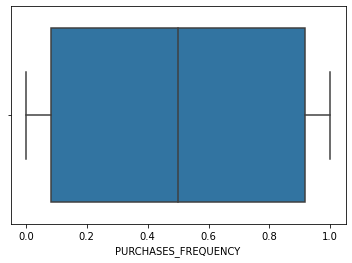

In [20]:
sns.boxplot(data[num_cols[6]])
plt.show()

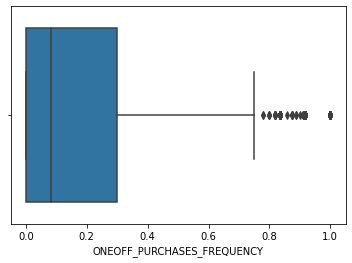

In [21]:
sns.boxplot(data[num_cols[7]])
plt.show()

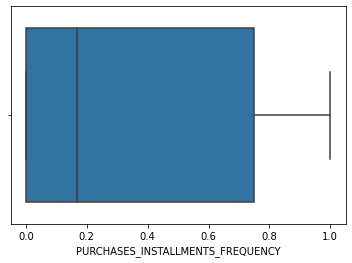

In [22]:
sns.boxplot(data[num_cols[8]])
plt.show()

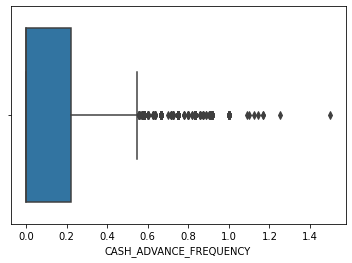

In [23]:
sns.boxplot(data[num_cols[9]])
plt.show()

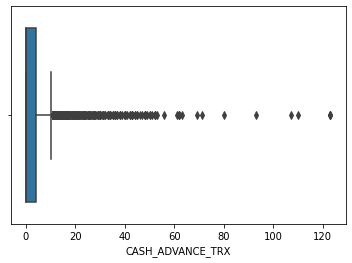

In [24]:
sns.boxplot(data[num_cols[10]])
plt.show()

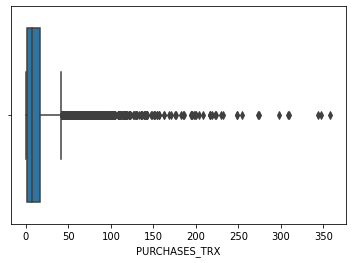

In [25]:
sns.boxplot(data[num_cols[11]])
plt.show()

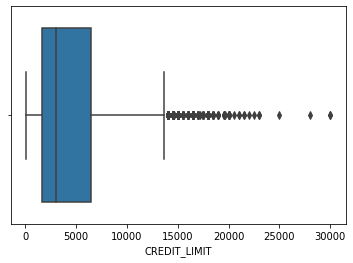

In [26]:
sns.boxplot(data[num_cols[12]])
plt.show()

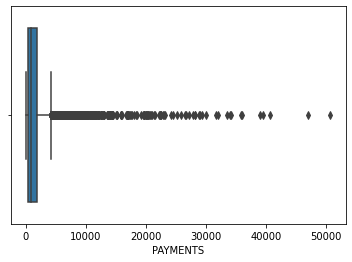

In [27]:
sns.boxplot(data[num_cols[13]])
plt.show()

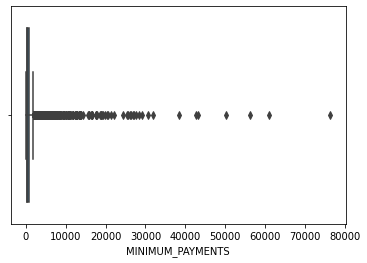

In [28]:
sns.boxplot(data[num_cols[14]])
plt.show()

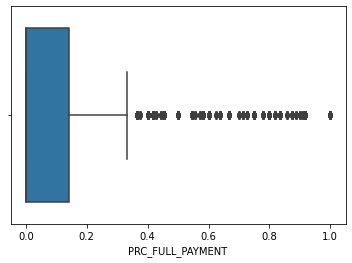

In [29]:
sns.boxplot(data[num_cols[15]])
plt.show()

In [30]:
data1 = data.copy(deep=True)

In [31]:
from scipy.stats import zscore     # To Apply Zscore Treatment

abs_zscores = np.abs(zscore(data1[num_cols]))     # Calculate the Z-score value of total bill
# The abs() function is used to return the absolute value of a number.
filtered = (abs_zscores < 3).all(axis=1)
data2 = data1[filtered]

In [32]:
data2.shape

(7434, 18)

c. Deal with correlated variables

In [33]:
data2.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.349404,0.042223,0.078321,-0.037524,0.509312,-0.145517,0.029860,-0.139821,0.466543,0.435774,0.009701,0.400751,0.240485,0.610902,-0.377288,0.057468
BALANCE_FREQUENCY,0.349404,1.000000,0.152808,0.113488,0.131446,0.085043,0.226480,0.178007,0.177131,0.186005,0.147070,0.210446,0.067577,0.061599,0.232204,-0.159424,0.104624
PURCHASES,0.042223,0.152808,1.000000,0.875720,0.652988,-0.143448,0.555402,0.611340,0.412956,-0.197785,-0.158409,0.744789,0.298157,0.438270,0.038342,0.194430,0.072604
ONEOFF_PURCHASES,0.078321,0.113488,0.875720,1.000000,0.206243,-0.089704,0.337738,0.692882,0.095937,-0.122729,-0.097218,0.552959,0.284639,0.401436,0.014227,0.102127,0.045241
INSTALLMENTS_PURCHASES,-0.037524,0.131446,0.652988,0.206243,1.000000,-0.150261,0.596025,0.152086,0.686644,-0.208456,-0.168699,0.642291,0.157688,0.258346,0.055252,0.233630,0.076047
CASH_ADVANCE,0.509312,0.085043,-0.143448,-0.089704,-0.150261,1.000000,-0.287348,-0.123338,-0.238911,0.671845,0.694980,-0.173397,0.221555,0.345054,0.268975,-0.203739,-0.086218
PURCHASES_FREQUENCY,-0.145517,0.226480,0.555402,0.337738,0.596025,-0.287348,1.000000,0.478305,0.855422,-0.354882,-0.293949,0.725113,0.118490,0.108915,-0.042378,0.307606,0.053851
ONEOFF_PURCHASES_FREQUENCY,0.029860,0.178007,0.611340,0.692882,0.152086,-0.123338,0.478305,1.000000,0.078747,-0.139606,-0.116999,0.582221,0.274026,0.247869,-0.027150,0.129034,0.061977
PURCHASES_INSTALLMENTS_FREQUENCY,-0.139821,0.177131,0.412956,0.095937,0.686644,-0.238911,0.855422,0.078747,1.000000,-0.295972,-0.245211,0.643047,0.035968,0.066594,-0.021312,0.256354,0.054076
CASH_ADVANCE_FREQUENCY,0.466543,0.186005,-0.197785,-0.122729,-0.208456,0.671845,-0.354882,-0.139606,-0.295972,1.000000,0.882863,-0.205582,0.056598,0.173954,0.246989,-0.272413,-0.078395


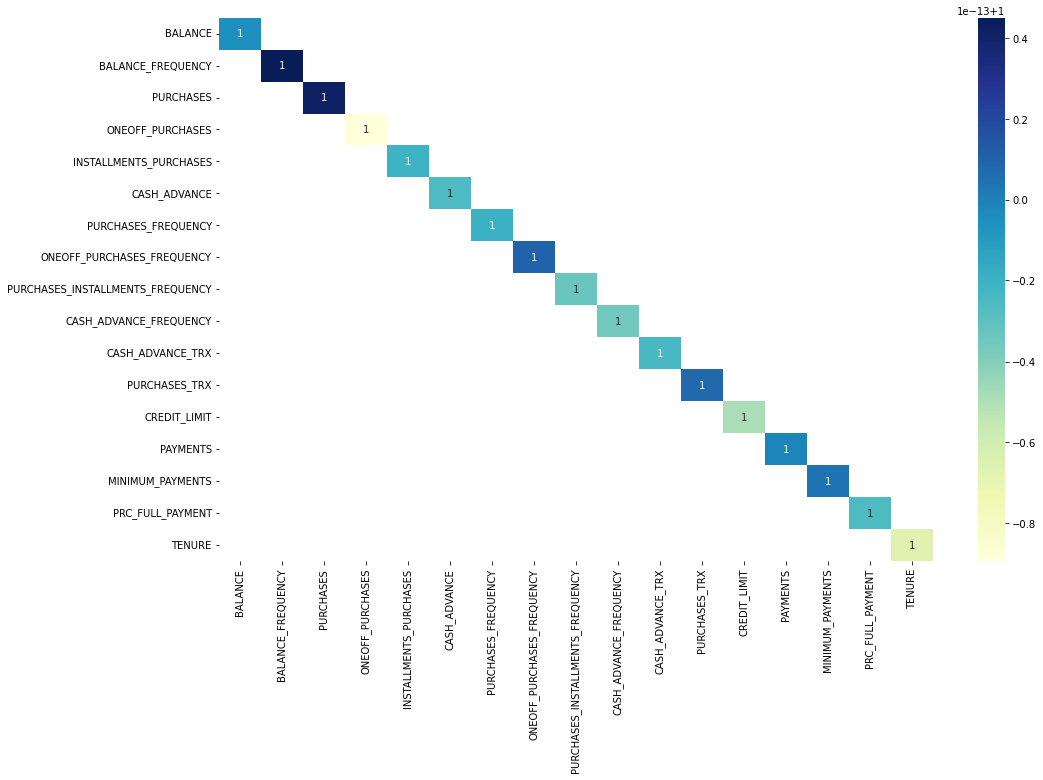

In [34]:
corr = data2.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr[(corr >=0.9) | (corr <= -0.9)], annot=True, cmap="YlGnBu")
plt.show()

#### Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [35]:
features = data2.drop(["CUST_ID"], axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features, columns=data.columns[1:36])
features_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187


In [37]:
from sklearn.decomposition import PCA
from numpy.linalg import eig

cov_mat = np.cov(features_scaled.T)
eig_val, eig_vec = eig(cov_mat)

In [38]:
eig_val = list(eig_val)
print(eig_val)
print()

cols = pd.Series(data.columns[1:36].values)
eig_val_df = pd.DataFrame(columns=["Features", "Eigen_value"])
eig_val_df["Features"] = cols
eig_val_df["Eigen_value"] = eig_val
eig_val_df = eig_val_df.sort_values(by="Eigen_value", ascending=False)
print(eig_val_df.head(10))
print()

eig_val.sort(reverse=True)
print(eig_val)

[4.92524749996989, 3.4619648024667007, 1.6205949880729977, 1.3097469626127685, 1.0739149207081846, 0.9159096228587275, 0.7940366361452109, 0.6484808634889621, 0.5876553196282568, 0.48123778108034415, 0.3080371418037856, 0.2938291577292953, 0.24045852615894353, 0.1945578820380998, 0.10801446497458307, 0.038566862281458704, 3.366605793546249e-05]

                           Features  Eigen_value
0                           BALANCE     4.925247
1                 BALANCE_FREQUENCY     3.461965
2                         PURCHASES     1.620595
3                  ONEOFF_PURCHASES     1.309747
4            INSTALLMENTS_PURCHASES     1.073915
5                      CASH_ADVANCE     0.915910
6               PURCHASES_FREQUENCY     0.794037
7        ONEOFF_PURCHASES_FREQUENCY     0.648481
8  PURCHASES_INSTALLMENTS_FREQUENCY     0.587655
9            CASH_ADVANCE_FREQUENCY     0.481238

[4.92524749996989, 3.4619648024667007, 1.6205949880729977, 1.3097469626127685, 1.0739149207081846, 0.91590962285

In [39]:
features_scaled.shape

(7434, 17)

In [40]:
pca = PCA().fit(features_scaled)
print(pca.explained_variance_ratio_)

[2.89681469e-01 2.03617595e-01 9.53162936e-02 7.70335753e-02
 6.31629683e-02 5.38697893e-02 4.67017544e-02 3.81408019e-02
 3.45633100e-02 2.83042968e-02 1.81173944e-02 1.72817431e-02
 1.41427165e-02 1.14430418e-02 6.35293736e-03 2.26833379e-03
 1.98008996e-06]


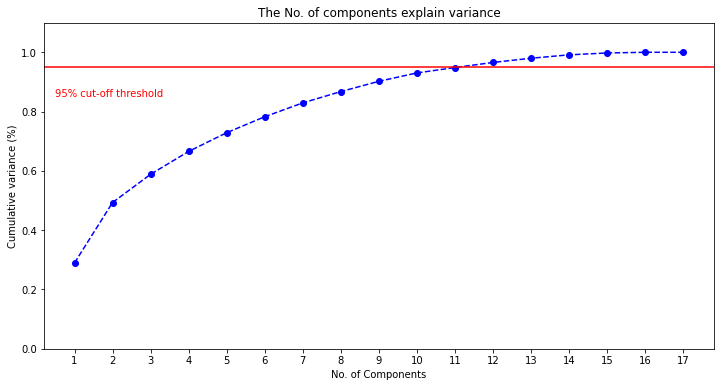

In [41]:
plt.rcParams['figure.figsize'] = (12, 6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0, 1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('No. of Components')
plt.xticks(np.arange(1, 18, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The No. of components explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red')

plt.show()

In [42]:
pca = PCA(n_components=11, random_state=123)
PrincipalComp = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(PrincipalComp, columns=list(eig_val_df["Features"])[0:11])
pca_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX
0,-1.325625,-2.046626,0.204168,-0.629249,0.063922,-0.321145,0.643574,-0.205845,-0.274637,-0.125446,0.039036
1,-2.781074,3.311279,0.444409,1.504716,-1.857740,0.175910,-0.372141,0.449321,-1.045414,1.490024,1.296720
2,1.237429,0.544760,1.472225,-2.058193,0.490464,-0.017539,-1.688912,-0.290765,0.758095,0.996202,-0.779984
3,-0.606674,-0.007237,1.815941,-1.006197,-0.773933,0.843505,0.180941,-0.717758,0.660198,-1.274210,0.792208
4,-1.448065,-1.469047,0.273819,-1.139256,0.214302,-0.436232,0.309731,0.229897,-0.805582,-0.032215,-0.095327


#### Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

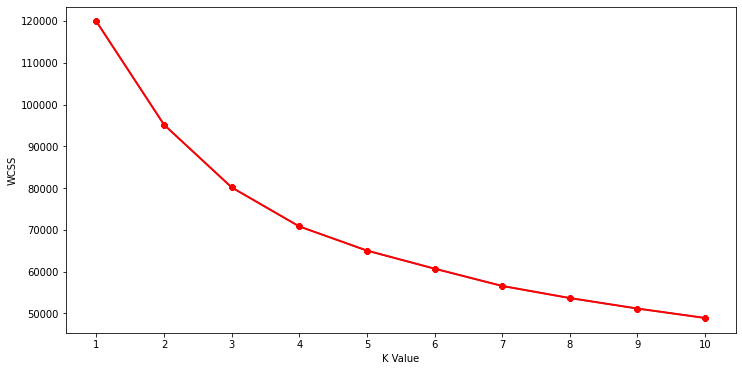

In [43]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(pca_df)
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

#### Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [44]:
from sklearn.metrics import silhouette_score

n_clusters = range(2, 11)

for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=112)
    predict = kmeans.fit_predict(pca_df)
    score = silhouette_score(pca_df, predict, random_state=1)
    print("k = {}, Score = {}".format(k, score))

k = 2, Score = 0.21606954020645033
k = 3, Score = 0.2156552051400088
k = 4, Score = 0.19672741136085198
k = 5, Score = 0.19840115235722233
k = 6, Score = 0.20497110513014455
k = 7, Score = 0.21410700098207644
k = 8, Score = 0.21817978450106265
k = 9, Score = 0.21382114081524353
k = 10, Score = 0.19340138569666315


In [45]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(pca_df)

KMeans()

In [46]:
data_output = pd.concat([data2[pca_df.columns], data2["CUST_ID"]], axis=1)


# Add a column 'cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = kmeans.labels_
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CUST_ID,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,C10001,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,C10002,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,C10003,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,C10004,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,C10005,6


In [47]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 939, 1538,  343,  891,  539,  385, 1964,  835]))

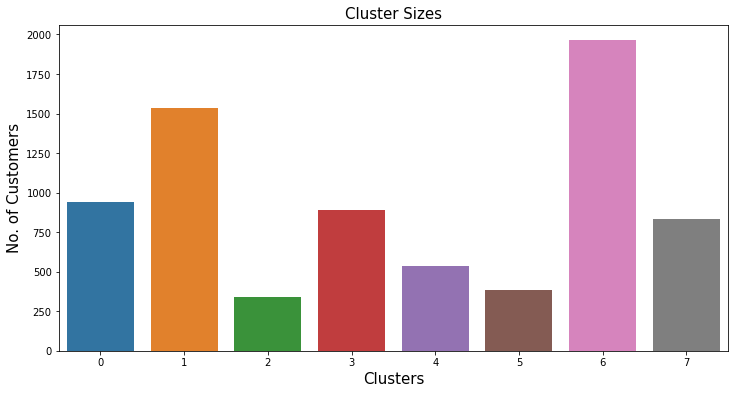

In [48]:
cluster_count = data_output["Cluster"].value_counts()
sns.barplot(x=cluster_count.index, y=cluster_count)

plt.title('Cluster Sizes', fontsize=15)
plt.xlabel('Clusters',fontsize=15)
plt.ylabel('No. of Customers',fontsize=15)

plt.show()

# Part II - Deep Learning

### Import important packages

In [49]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM, Dropout
from keras.models import Sequential

### Import Dataset

In [50]:
data = pd.read_csv("Sentiment.csv")
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [52]:
data1 = data[["text", "sentiment"]]
data1.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


### Understanding Data & Preprocessing

In [53]:
data1.shape

(13871, 2)

#### Q1. Print the total number of positive and negative sentiments.

In [54]:
data1 = data1[(data1["sentiment"] == 'Positive') | (data1["sentiment"] == 'Negative')]

In [55]:
data1.shape

(10729, 2)

In [56]:
from collections import Counter
Counter(data1["sentiment"])

Counter({'Positive': 2236, 'Negative': 8493})

In [57]:
data1.isnull().sum()

text         0
sentiment    0
dtype: int64

In [58]:
import re
from nltk.corpus import stopwords

texts = data1["text"]
english_stops = set(stopwords.words('english'))

texts = texts.replace({'<.*?>': ''}, regex = True)          # remove html tag
texts = texts.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
texts = texts.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
texts = texts.apply(lambda review: " ".join([w.lower() for w in review]))   # lower case
texts

1        rt scottwalker didn catch full gopdebate last ...
3        rt robgeorge that carly fiorina trending hours...
4        rt danscavino gopdebate w realdonaldtrump deli...
5        rt gregabbott tx tedcruz on first day i rescin...
6        rt warriorwoman i liked happy i heard going mo...
                               ...                        
13866    rt cappy yarbrough love see men never faced pr...
13867    rt georgehenryw who thought huckabee exceeded ...
13868    rt lrihendry tedcruz as president i always tel...
13869    rt jrehling gopdebate donald trump says time p...
13870    rt lrihendry tedcruz headed presidential debat...
Name: text, Length: 10729, dtype: object

In [59]:
maxlen = 50

In [60]:
texts = np.asarray(texts)
labels = np.asarray(data1["sentiment"].map({"Positive": 0, "Negative": 1}))
texts

array(['rt scottwalker didn catch full gopdebate last night here scott best lines seconds walker http co zsff',
       'rt robgeorge that carly fiorina trending hours her debate men completed gopdebate says',
       'rt danscavino gopdebate w realdonaldtrump delivered highest ratings history presidential debates trump http co',
       ...,
       'rt lrihendry tedcruz as president i always tell truth i said i would gopdebates',
       'rt jrehling gopdebate donald trump says time political correctness how calling women fat pigs save',
       'rt lrihendry tedcruz headed presidential debates go ted gopdebates http co s pz a'],
      dtype=object)

In [61]:
labels

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
#Tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=maxlen)
max_features = len(tokenizer.word_index) + 1

In [63]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
y = labels
X, y = oversample.fit_resample(X, y)

In [64]:
Counter(y)

Counter({0: 8493, 1: 8493})

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13588, 50)
(3398, 50)
(13588,)
(3398,)


#### Q2. Build a sequential LSTM model to predict positive and negative sentiments.

In [66]:
model1 = Sequential()
model1.add(Embedding(max_features, 32, input_length = maxlen))
model1.add(LSTM(64))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            489312    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 514,209
Trainable params: 514,209
Non-trainable params: 0
_________________________________________________________________


In [67]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 60, epochs = 25, verbose=1)

Epoch 1/25
227/227 [==============================] - 4s 7ms/step - loss: 0.5407 - accuracy: 0.7221 - val_loss: 0.4724 - val_accuracy: 0.7743
Epoch 2/25
227/227 [==============================] - 1s 5ms/step - loss: 0.3198 - accuracy: 0.8674 - val_loss: 0.4621 - val_accuracy: 0.7896
Epoch 3/25
227/227 [==============================] - 1s 5ms/step - loss: 0.2031 - accuracy: 0.9260 - val_loss: 0.5382 - val_accuracy: 0.7772
Epoch 4/25
227/227 [==============================] - 1s 5ms/step - loss: 0.1369 - accuracy: 0.9528 - val_loss: 0.7030 - val_accuracy: 0.7710
Epoch 5/25
227/227 [==============================] - 1s 5ms/step - loss: 0.1024 - accuracy: 0.9645 - val_loss: 0.7984 - val_accuracy: 0.7707
Epoch 6/25
227/227 [==============================] - 1s 5ms/step - loss: 0.0820 - accuracy: 0.9703 - val_loss: 0.9539 - val_accuracy: 0.7634
Epoch 7/25
227/227 [==============================] - 1s 5ms/step - loss: 0.0722 - accuracy: 0.9743 - val_loss: 1.0084 - val_accuracy: 0.7607
Epoch 

In [68]:
model2 = Sequential()
model2.add(Embedding(max_features, 32, input_length = maxlen))
model2.add(LSTM(128))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            489312    
                                                                 
 lstm_1 (LSTM)               (None, 128)               82432     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 571,873
Trainable params: 571,873
Non-trainable params: 0
_________________________________________________________________


In [69]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 60, epochs = 25, verbose=1)

Epoch 1/25
227/227 [==============================] - 3s 8ms/step - loss: 0.5635 - accuracy: 0.6997 - val_loss: 0.4664 - val_accuracy: 0.7716
Epoch 2/25
227/227 [==============================] - 1s 6ms/step - loss: 0.3349 - accuracy: 0.8633 - val_loss: 0.4642 - val_accuracy: 0.7834
Epoch 3/25
227/227 [==============================] - 1s 6ms/step - loss: 0.2131 - accuracy: 0.9209 - val_loss: 0.5402 - val_accuracy: 0.7763
Epoch 4/25
227/227 [==============================] - 1s 6ms/step - loss: 0.1442 - accuracy: 0.9485 - val_loss: 0.5963 - val_accuracy: 0.7740
Epoch 5/25
227/227 [==============================] - 1s 6ms/step - loss: 0.1077 - accuracy: 0.9633 - val_loss: 0.7579 - val_accuracy: 0.7705
Epoch 6/25
227/227 [==============================] - 1s 6ms/step - loss: 0.0883 - accuracy: 0.9683 - val_loss: 0.7904 - val_accuracy: 0.7690
Epoch 7/25
227/227 [==============================] - 1s 6ms/step - loss: 0.0771 - accuracy: 0.9734 - val_loss: 0.9388 - val_accuracy: 0.7590
Epoch 

In [70]:
from keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam, SGD

In [71]:
model3 = Sequential()
model3.add(Embedding(max_features, 16, input_length = maxlen))
model3.add(Dropout(0.2))
model3.add(Bidirectional(LSTM(20, return_sequences=True)))
model3.add(Bidirectional(LSTM(20)))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            244656    
                                                                 
 dropout_1 (Dropout)         (None, 50, 16)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 512)               20992     
                                                                 
 dropout_2 (Dropout)         (None, 512)              

In [72]:
model3.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = model3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 60, epochs = 25, verbose=1)

Epoch 1/25
227/227 [==============================] - 9s 19ms/step - loss: 0.5229 - accuracy: 0.7273 - val_loss: 0.4814 - val_accuracy: 0.7743
Epoch 2/25
227/227 [==============================] - 3s 13ms/step - loss: 0.2921 - accuracy: 0.8867 - val_loss: 0.4640 - val_accuracy: 0.7884
Epoch 3/25
227/227 [==============================] - 3s 13ms/step - loss: 0.1630 - accuracy: 0.9388 - val_loss: 0.7159 - val_accuracy: 0.7743
Epoch 4/25
227/227 [==============================] - 3s 13ms/step - loss: 0.1185 - accuracy: 0.9564 - val_loss: 1.0791 - val_accuracy: 0.7805
Epoch 5/25
227/227 [==============================] - 3s 13ms/step - loss: 0.0974 - accuracy: 0.9647 - val_loss: 0.9914 - val_accuracy: 0.7719
Epoch 6/25
227/227 [==============================] - 3s 13ms/step - loss: 0.0899 - accuracy: 0.9670 - val_loss: 0.8416 - val_accuracy: 0.7743
Epoch 7/25
227/227 [==============================] - 3s 13ms/step - loss: 0.0859 - accuracy: 0.9688 - val_loss: 0.8431 - val_accuracy: 0.7746

In [73]:
from keras.layers import Conv1D, MaxPooling1D

model4 = Sequential()
model4.add(Embedding(max_features, 32, input_length=maxlen))
model4.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Bidirectional(LSTM(32)))
model4.add(Dropout(0.4))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            489312    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [74]:
model4.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.1, momentum=0.8), metrics=['accuracy'])
hist = model4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=20, verbose=1)

Epoch 1/20
213/213 [==============================] - 5s 10ms/step - loss: 0.6941 - accuracy: 0.5077 - val_loss: 0.6952 - val_accuracy: 0.5026
Epoch 2/20
213/213 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.5224 - val_loss: 0.6868 - val_accuracy: 0.4974
Epoch 3/20
213/213 [==============================] - 1s 7ms/step - loss: 0.6215 - accuracy: 0.6498 - val_loss: 0.5795 - val_accuracy: 0.7069
Epoch 4/20
213/213 [==============================] - 1s 7ms/step - loss: 0.5013 - accuracy: 0.7606 - val_loss: 0.4750 - val_accuracy: 0.7722
Epoch 5/20
213/213 [==============================] - 1s 7ms/step - loss: 0.4268 - accuracy: 0.8096 - val_loss: 0.5856 - val_accuracy: 0.7154
Epoch 6/20
213/213 [==============================] - 1s 7ms/step - loss: 0.3540 - accuracy: 0.8519 - val_loss: 0.4242 - val_accuracy: 0.8111
Epoch 7/20
213/213 [==============================] - 1s 6ms/step - loss: 0.2981 - accuracy: 0.8764 - val_loss: 0.4347 - val_accuracy: 0.8190
Epoch

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model4.predict(X_test)
y_pred_final = y_pred.round()
print("Accuracy Score: ", accuracy_score(y_test, y_pred_final))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_final))
print("Classification report: ")
print(classification_report(y_test, y_pred_final))

Accuracy Score:  0.8119482048263684
Confusion Matrix: 
[[1366  324]
 [ 315 1393]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1690
           1       0.81      0.82      0.81      1708

    accuracy                           0.81      3398
   macro avg       0.81      0.81      0.81      3398
weighted avg       0.81      0.81      0.81      3398



#### Q3. Based on the model, check the sentiment for the following two sentences
#### a. 'He is a great leader.'
#### b. 'He is a terrible leader.'

In [76]:
test = np.asarray(["He is a great leader", "He is a terrible leader"])
test

array(['He is a great leader', 'He is a terrible leader'], dtype='<U23')

In [77]:
tokenizer.fit_on_texts(test)
sequences = tokenizer.texts_to_sequences(test)
X_test1 = pad_sequences(sequences, maxlen=maxlen)

In [78]:
y_pred = model4.predict(X_test1)
y_pred_final = y_pred.round()
y_pred_final

array([[0.],
       [0.]], dtype=float32)

From the above results, we can conclude that both the statements are predicted as "Positive" sentiments.